In [1]:
import numpy as np

class DecisionTreeClassifierManual:
    def __init__(self, max_depth=None, algorithm='CART'):
        self.max_depth = max_depth
        self.algorithm = algorithm
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.tree) for x in X])
    
    def _gini(self, y):
        classes, counts = np.unique(y, return_counts=True)
        impurity = 1 - sum((count / len(y))**2 for count in counts)
        return impurity
    
    def _entropy(self, y):
        classes, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return -np.sum(probabilities * np.log2(probabilities + 1e-9))
    
    def _information_gain(self, y, y_left, y_right):
        parent_entropy = self._entropy(y)
        left_entropy = self._entropy(y_left)
        right_entropy = self._entropy(y_right)
        weighted_entropy = (len(y_left) * left_entropy) + (len(y_right) * right_entropy) / len(y)
        return parent_entropy - weighted_entropy
    
    def _best_split(self, X, y):
        best_split = None
        best_threshold = None
        best_metric = -float('inf') if self.algorithm == 'ID3' else float('inf')
        n_features = X.shape[1]

        for feature_index in range(n_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                _, _, y_left, y_right = self._split(X, y, feature_index, threshold)

                if len(y_left) == 0 or len(y_right) == 0:
                    continue

                if self.algorithm == 'CART':
                    gini_left = self._gini(y_left)
                    gini_right = self._gini(y_right)
                    weighted_gini = (len(y_left) * gini_left + len(y_right) * gini_right) / len(y)
                    metric = weighted_gini

                    if metric < best_metric:
                        best_feature = feature_index
                        best_threshold = threshold
                        best_metric = metric

                elif self.algorithm == 'ID3':
                    gain = self._information_gain(y, y_left, y_right)
                    if gain > best_metric:
                        best_feature = feature_index
                        best_threshold = threshold
                        best_metric = gain

        return best_feature, best_threshold
    
    def _split(self, X, y, feature_index, threshold):
        left_indices = X[:, feature_index] < threshold
        right_indices = ~left_indices
        return X[left_indices], X[right_indices], y[left_indices], y[right_indices]
    
    def _build_tree(self, X, y, depth):
        if len(np.unique(y)) == 1 or len(y) == 0 or (self.max_depth is not None and depth >= self.max_depth):
            return {"type": "leaf", "class": np.bincount(y).argmax()}

        feature, threshold = self._best_split(X, y)
        if feature is None or threshold is None:
            return {"type": "leaf", "class": np.bincount(y).argmax()}

        X_left, X_right, y_left, y_right = self._split(X, y, feature, threshold)

        return {
            "type": "node",
            "feature": feature,
            "threshold": threshold,
            "left": self._build_tree(X_left, y_left, depth + 1),
            "right": self._build_tree(X_right, y_right, depth + 1)
        }
    
    def _traverse_tree(self, x, node):
        if node["type"] == "leaf":
            return node["class"]
        if x[node["feature"]] < node["threshold"]:
            return self._traverse_tree(x, node["left"])
        else:
            return self._traverse_tree(x, node["right"])

In [2]:
import pandas as pd
import numpy as np

dataset = pd.read_csv("C:\\Users\\Des\\Downloads\\SDN_traffic.csv")

print(dataset.head())
print(dataset.info())
print(dataset.describe())
print(dataset.duplicated())

X = dataset[["forward_bps_var", "tp_src", "tp_dst", "nw_proto", "forward_pc", "forward_bc", "forward_pl", 
    "forward_piat", "forward_pps", "forward_bps", "forward_pl_mean", "forward_piat_mean", 
    "forward_pps_mean", "forward_bps_mean", "forward_pl_var", "forward_piat_var", 
    "forward_pps_var", "forward_pl_q1", "forward_pl_q3", "forward_piat_q1", 
    "forward_piat_q3", "forward_pl_max", "forward_pl_min", "forward_piat_max", 
    "forward_piat_min", "forward_pps_max", "forward_pps_min", "forward_bps_max", 
    "forward_bps_min", "forward_duration", "forward_size_packets", "forward_size_bytes", 
    "reverse_pc", "reverse_bc", "reverse_pl", "reverse_piat", "reverse_pps", "reverse_bps", 
    "reverse_pl_mean", "reverse_piat_mean", "reverse_pps_mean", "reverse_bps_mean", 
    "reverse_pl_var", "reverse_piat_var", "reverse_pps_var", "reverse_bps_var", 
    "reverse_pl_q1", "reverse_pl_q3", "reverse_piat_q1", "reverse_piat_q3", 
    "reverse_pl_max", "reverse_pl_min", "reverse_piat_max", "reverse_piat_min", 
    "reverse_pps_max", "reverse_pps_min", "reverse_bps_max", "reverse_bps_min", 
    "reverse_duration", "reverse_size_packets", "reverse_size_bytes"
]]

# Fix specific rows with incorrect or NaN values for the 'forward_bps_var' column
X.loc[1877, 'forward_bps_var'] = float(11968065203349.0)
X.loc[1931, 'forward_bps_var'] = float(12880593804833.0)
X.loc[2070, 'forward_bps_var'] = float(9022747730895.0)
X.loc[2381, 'forward_bps_var'] = float(39987497172945.0)
X.loc[2562, 'forward_bps_var'] = float(663300742992.0)
X.loc[2567, 'forward_bps_var'] = float(37770223877794.0)
X.loc[2586, 'forward_bps_var'] = float(97227875083751.0)
X.loc[2754, 'forward_bps_var'] = float(18709751403737.0)
X.loc[2765, 'forward_bps_var'] = float(33969277035759.0)
X.loc[2904, 'forward_bps_var'] = float(39204786962856.0)
X.loc[3044, 'forward_bps_var'] = float(9169996063653.0)
X.loc[3349, 'forward_bps_var'] = float(37123283690575.0)
X.loc[3507, 'forward_bps_var'] = float(61019064590464.0)
X.loc[3610, 'forward_bps_var'] = float(46049620984072.0)
X.loc[3717, 'forward_bps_var'] = float(97158873841506.0)
X.loc[3845, 'forward_bps_var'] = float(11968865203349.0)
X.loc[3868, 'forward_bps_var'] = float(85874278395372.0)

X['forward_bps_var'] = pd.to_numeric(X['forward_bps_var'])

print(X.info())

Y = dataset[["category"]]
Y = Y.to_numpy()
Y = Y.ravel()

labels, uniques = pd.factorize(Y)
Y = labels
Y = Y.ravel()

import scipy.stats as stats
X = stats.zscore(X)
X = np.nan_to_num(X)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

                            id_flow         nw_src  tp_src         nw_dst  \
0  b2bb77a570fcfa9325eb9e51b6116d2a  172.16.25.104   41402  34.107.221.82   
1  f07977b0d1d6645c4fe1e9efea080ff3  172.16.25.104   41406  34.107.221.82   
2  e4026ba9b6c1957516e92bdd0d04878f  172.16.25.104   38232    52.84.77.43   
3  e2d747932e41500b1463fe8ae4299ecb  172.16.25.104   38234    52.84.77.43   
4  56325703391225ad65e013e7a2b02fac  172.16.25.104   60166    52.32.34.32   

   tp_dst  nw_proto  forward_pc  forward_bc  forward_pl  forward_piat  ...  \
0      80         6           5         300       60.00           6.0  ...   
1      80         6           5         300       60.00           6.0  ...   
2     443         6           3         198       66.00          10.0  ...   
3     443         6           3         198       66.00          10.0  ...   
4     443         6           4         265       66.25           7.5  ...   

   reverse_piat_max  reverse_piat_min  reverse_pps_max  reverse_pps_

C:\Users\Des\AppData\Local\Temp\ipykernel_28736\3342054250.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['forward_bps_var'] = pd.to_numeric(X['forward_bps_var'])


In [ ]:
clf_cart = DecisionTreeClassifierManual(max_depth=6, algorithm='ID3')
clf_cart.fit(X_train, Y_train)
print("CART Predictions:", clf_cart.predict(X_train))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score, KFold

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, Y_train)

cv = KFold(n_splits=10, random_state=0, shuffle=True)
accuracy = clf.score(X_test, Y_test)
KFold10_accuracy = cross_val_score(clf, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(KFold10_accuracy.mean())

predict = clf.predict(X_test)
cm = confusion_matrix(Y_test, predict)
precision = precision_score(Y_test, predict, average='weighted', labels=np.unique(predict))
recall = recall_score(Y_test, predict, average='weighted', labels=np.unique(predict))
f1scoremacro = f1_score(Y_test, predict, average='macro', labels=np.unique(predict))
print(classification_report(Y_test, predict, target_names=uniques))

importance = clf.feature_importances_
important_features_dict = {}
for idx, val in enumerate(importance):
    important_features_dict[idx] = val

important_features_list = sorted(important_features_dict, key=important_features_dict.get, reverse=True)
print('10 most important features:', important_features_list[:10])

0.7630755755755756
              precision    recall  f1-score   support

         WWW       0.86      0.85      0.85       735
         DNS       0.76      0.72      0.74        53
        VOIP       0.30      0.33      0.31        80
        ICMP       0.38      0.47      0.42       120
         FTP       0.40      0.32      0.36        66
         P2P       0.97      0.94      0.95       217

    accuracy                           0.76      1271
   macro avg       0.61      0.60      0.61      1271
weighted avg       0.77      0.76      0.76      1271

10 most important features: [2, 3, 1, 26, 18, 31, 40, 56, 15, 8]


In [ ]:
accuracy = clf.score(X_test, Y_test)
print("ID3 Predictions Accuracy:", accuracy)

ID3 Predictions Accuracy: 0.7616050354051928


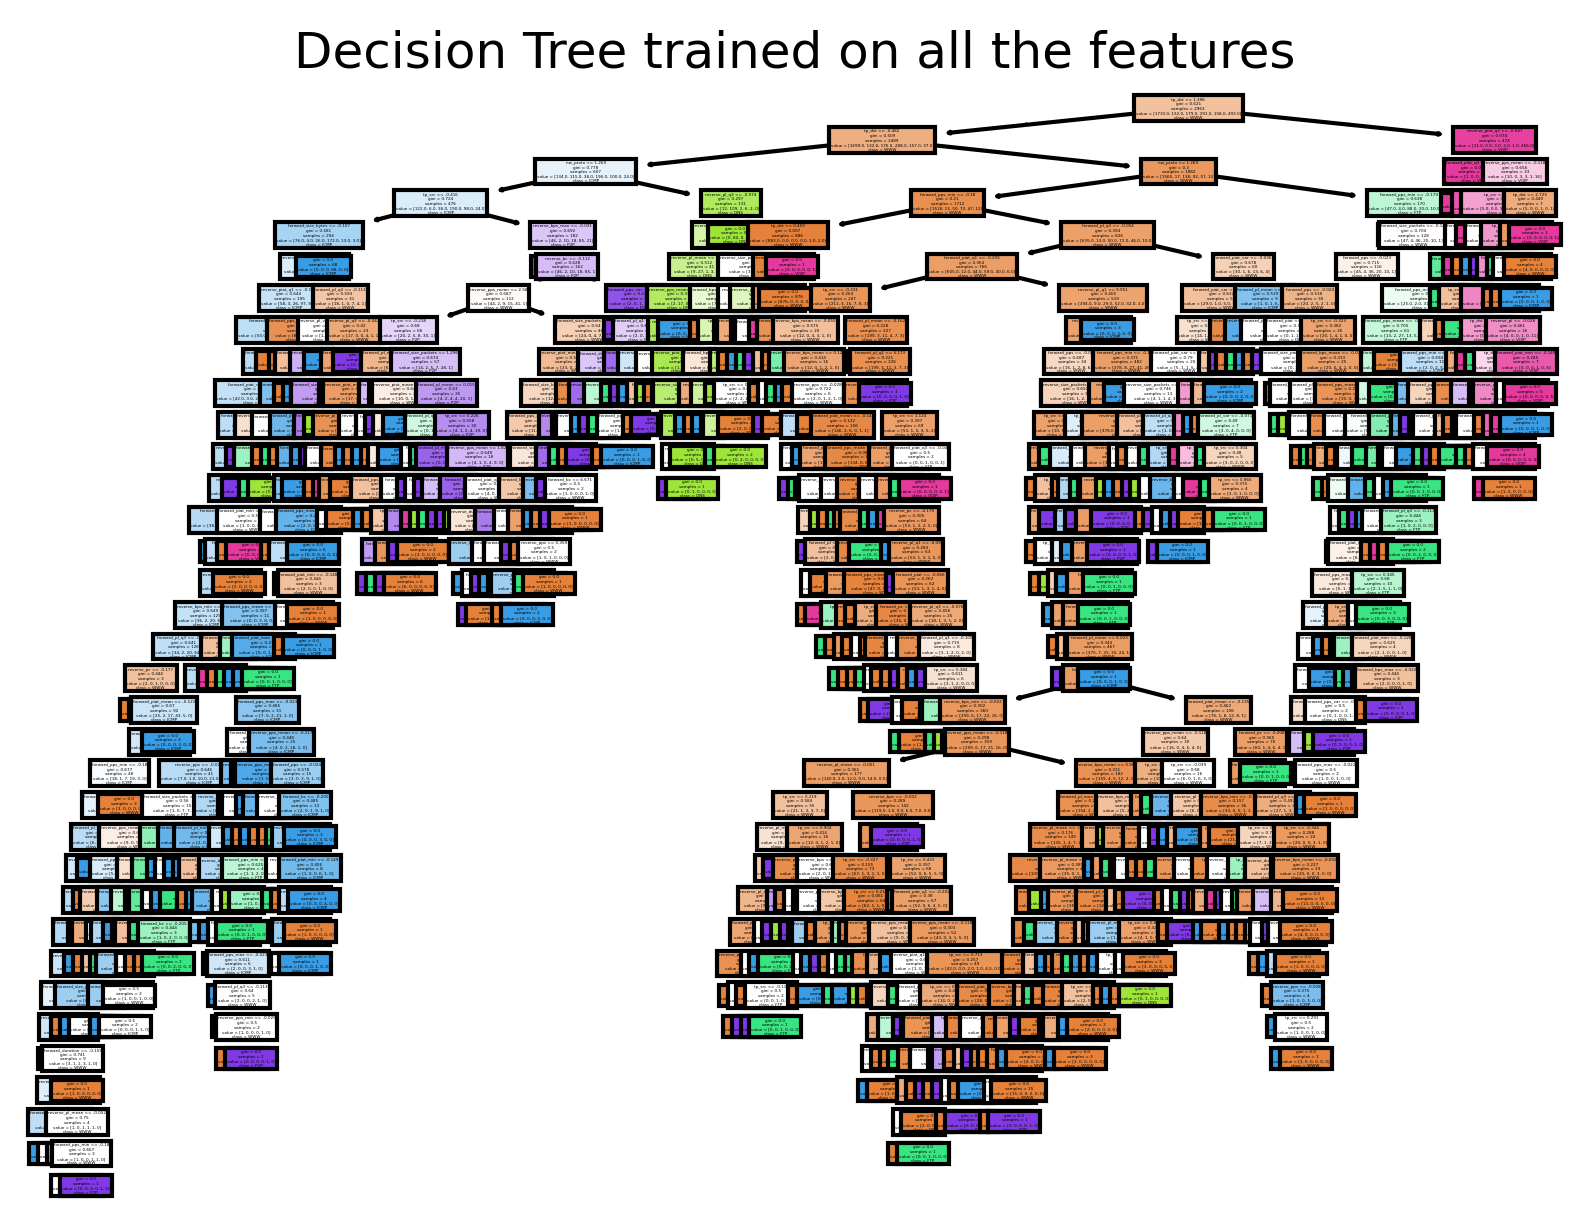

<Axes: title={'center': 'Confusion Matrix'}>

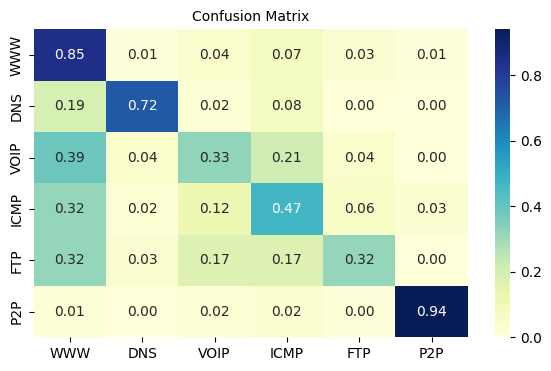

In [ ]:
fn = ["forward_bps_var", "tp_src", "tp_dst", "nw_proto", "forward_pc", "forward_bc", "forward_pl", 
    "forward_piat", "forward_pps", "forward_bps", "forward_pl_mean", "forward_piat_mean", 
    "forward_pps_mean", "forward_bps_mean", "forward_pl_var", "forward_piat_var", 
    "forward_pps_var", "forward_pl_q1", "forward_pl_q3", "forward_piat_q1", 
    "forward_piat_q3", "forward_pl_max", "forward_pl_min", "forward_piat_max", 
    "forward_piat_min", "forward_pps_max", "forward_pps_min", "forward_bps_max", 
    "forward_bps_min", "forward_duration", "forward_size_packets", "forward_size_bytes", 
    "reverse_pc", "reverse_bc", "reverse_pl", "reverse_piat", "reverse_pps", "reverse_bps", 
    "reverse_pl_mean", "reverse_piat_mean", "reverse_pps_mean", "reverse_bps_mean", 
    "reverse_pl_var", "reverse_piat_var", "reverse_pps_var", "reverse_bps_var", 
    "reverse_pl_q1", "reverse_pl_q3", "reverse_piat_q1", "reverse_piat_q3", 
    "reverse_pl_max", "reverse_pl_min", "reverse_piat_max", "reverse_piat_min", 
    "reverse_pps_max", "reverse_pps_min", "reverse_bps_max", "reverse_bps_min", 
    "reverse_duration", "reverse_size_packets", "reverse_size_bytes"
]

la = ['WWW', 'DNS', 'FTP', 'ICMP', 'P2P', 'VOIP']
plt.figure(1, dpi=300)
fig = tree.plot_tree(clf, feature_names=fn, class_names=la, filled=True)
plt.title("Decision Tree trained on all the features")
plt.show()

import seaborn as sn
import matplotlib.pyplot as plt

labels = uniques
plt.figure(2, figsize=(7, 4))
plt.title("Confusion Matrix", fontsize=10)

cmnew = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sn.heatmap(cmnew, annot=True, cmap='YlGnBu', fmt=".2f", xticklabels=labels, yticklabels=labels)

In [ ]:
# Initialize classifiers for both algorithms
clf_id3 = DecisionTreeClassifierManual(max_depth=6, algorithm='ID3')
clf_cart = DecisionTreeClassifierManual(max_depth=6, algorithm='CART')

# Fit the classifiers
clf_id3.fit(X_train, Y_train)
clf_cart.fit(X_train, Y_train)

# Predict using both classifiers
predictions_id3 = clf_id3.predict(X_test)
predictions_cart = clf_cart.predict(X_test)

# Evaluate performance
accuracy_id3 = np.mean(predictions_id3 == Y_test)
accuracy_cart = np.mean(predictions_cart == Y_test)

print(f"ID3 Accuracy: {accuracy_id3}")
print(f"CART Accuracy: {accuracy_cart}")

# Generate classification reports
report_id3 = classification_report(Y_test, predictions_id3, target_names=uniques)
report_cart = classification_report(Y_test, predictions_cart, target_names=uniques)

print("ID3 Classification Report:")
print(report_id3)

print("CART Classification Report:")
print(report_cart)